### NLP Playground

Mostly playing around [this](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX) really helpful & concise playlist.
> Caution: Do not take anything inside this notebook seriously

In [2]:
import pandas as pd
import numpy as np

import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [3]:
url="https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/9_bag_of_words/movies_sentiment_data.csv"
df =pd.read_csv(url)

df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [4]:
# this df has 19k rows, i won't be needing that much for just playing around, so let's sample
df = df.sample(n=5000, random_state=42)
df.head()

,review,sentiment
7592,I really don't see how anyone could enjoy this...,negative
12051,Although I have enjoyed Bing Crosby in other m...,negative
17353,"I really think that this movie is great, perso...",positive
17873,I'm not entirely sure Rob Schmidt qualifies as...,positive
18496,Its a very good comedy movie.Ijust liked it.I ...,positive


In [5]:
# load english language model
nlp = spacy.load("en_core_web_md") 

def preprocess(text:str)->str:
    """Simply remove stop words and lemmatize"""
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

<AxesSubplot: xlabel='sentiment', ylabel='count'>

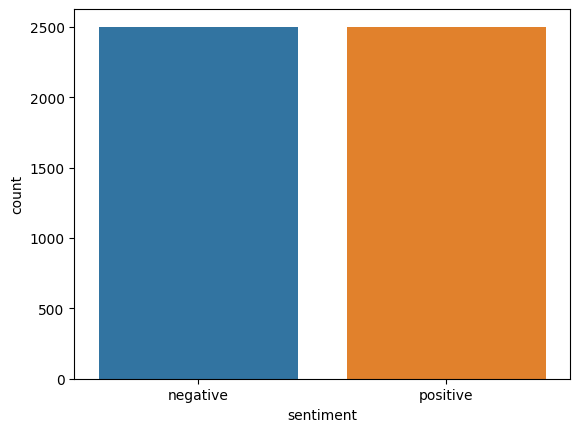

In [6]:
# Lets see the class distribution too
import seaborn as sns

sns.countplot(df, x="sentiment")

# wow its pretty balanced, sadly its never the case in real world :(

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, stratify=df.sentiment, random_state=42)
len(X_train), len(X_test)

(3750, 1250)

In [9]:
y_train.value_counts()

positive    1875
negative    1875
Name: sentiment, dtype: int64

### Bag of words

In [22]:
bow_vectorizer = CountVectorizer(ngram_range=(1,1)) # only 1-gram
X_train_features = bow_vectorizer.fit_transform(X_train)
X_test_features = bow_vectorizer.transform(X_test)

In [23]:
arr = X_train_features.toarray() # what a sparse array
arr[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
arr.shape #34.2k words? damn

(3750, 34213)

In [25]:
bow_vectorizer.get_feature_names_out() # Well looks like most of them are stop words

array(['00', '000', '00001', ..., 'ísnt', 'über', 'üvegtigris'],
      dtype=object)

In [26]:
bow_vectorizer.vocabulary_

{'some': 28302,
 'films': 11426,
 'just': 16665,
 'simply': 27645,
 'should': 27398,
 'not': 20969,
 'be': 2866,
 'remade': 25018,
 'this': 30602,
 'is': 16123,
 'one': 21366,
 'of': 21240,
 'them': 30517,
 'in': 15287,
 'and': 1484,
 'itself': 16179,
 'it': 16162,
 'bad': 2512,
 'film': 11407,
 'but': 4474,
 'fails': 10976,
 'to': 30859,
 'capture': 4796,
 'the': 30499,
 'flavor': 11608,
 'terror': 30425,
 '1963': 173,
 'same': 26251,
 'title': 30839,
 'liam': 17730,
 'neeson': 20610,
 'was': 33118,
 'excellent': 10631,
 'as': 2011,
 'he': 13968,
 'always': 1302,
 'most': 20066,
 'cast': 4972,
 'holds': 14489,
 'up': 32262,
 'with': 33648,
 'exception': 10638,
 'owen': 21804,
 'wilson': 33554,
 'who': 33437,
 'did': 8478,
 'bring': 4133,
 'right': 25585,
 'feel': 11232,
 'character': 5292,
 'luke': 18272,
 'major': 18534,
 'fault': 11157,
 'version': 32610,
 'that': 30489,
 'strayed': 29229,
 'too': 30940,
 'far': 11068,
 'from': 12183,
 'shirley': 27317,
 'jackson': 16224,
 'story': 

In [27]:
X_train[17888]

"Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more."

In [28]:
# Lets see the corresponding vector for this
np.where(arr[0]!=0)

(array([  173,   970,  1302,  1484,  2011,  2225,  2512,  2866,  4133,
         4474,  4796,  4972,  5292,  8478,  9616,  9766, 10210, 10631,
        10638, 10976, 11068, 11157, 11232, 11407, 11426, 11608, 11837,
        12132, 12183, 13152, 13968, 14489, 15287, 16123, 16162, 16179,
        16224, 16665, 17730, 18146, 18272, 18534, 20002, 20066, 20172,
        20610, 20969, 21240, 21241, 21312, 21366, 21804, 25018, 25585,
        26251, 26420, 27317, 27398, 27645, 28120, 28302, 28507, 29177,
        29229, 30425, 30489, 30499, 30517, 30602, 30654, 30839, 30859,
        30940, 31102, 32262, 32610, 33118, 33437, 33527, 33554, 33648,
        34026]),)

In [29]:
arr[0][16162]

5

In [30]:
# lets see what word do we have at index 173
bow_vectorizer.get_feature_names_out()[16162]

'it'

In [33]:
# Lets train a simple multinomial bias classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [32]:
clf = MultinomialNB()
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.86      0.82       625
    positive       0.85      0.77      0.80       625

    accuracy                           0.81      1250
   macro avg       0.82      0.81      0.81      1250
weighted avg       0.82      0.81      0.81      1250



In [36]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_features, y_train)

y_pred = clf.predict(X_test_features)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.82      0.84       625
    positive       0.83      0.87      0.85       625

    accuracy                           0.84      1250
   macro avg       0.85      0.84      0.84      1250
weighted avg       0.85      0.84      0.84      1250

